In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from math import ceil
from itertools import product
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [2]:
def load(filename: str):
    return pd.read_csv(filename, sep='\t')

In [3]:
froid1_data = load('../data/froid1.xls')
froid2_data = load('../data/froid2.xls')
chaud3_data = load('../data/chaud3.xls')
chaud4_data = load('../data/chaud4.xls')
tiede5_data = load('../data/tiede5.xls')
tiede6_data = load('../data/tiede6.xls')
tiede7_data = load('../data/tiede7.xls')

In [4]:
def convert(data: pd.DataFrame, dim: dimensions) -> tuple[np.ndarray, np.ndarray]:
    eps = (data['Deformation [V]'] - data['Deformation [V]'][0]) * 5 / dim.longueur
    sigma = data['Force [V]'] * 1000 / 0.934 / (dim.largeur * dim.epaisseur * 1e-6)
    # sigma = data['Force [V]'] * 500 / (dim.largeur * dim.epaisseur * 1e-6)
    return eps, sigma

# Young et $\sigma_\text{max}$

In [5]:
def dothefit(x: np.ndarray, y: np.ndarray, start: int | None = None, end: int | None = None) -> np.ndarray:
    if start is None:
        start = 0
    if end is None:
        end = len(x) - 1
    
    coefs, cov = np.polyfit(nom_vals(x[start:end]), nom_vals(y[start:end]), 1, cov=True)
    coefserr = unp.uarray(coefs, np.sqrt(np.diag(cov)))

    return coefserr

In [6]:
def do_everything_fuck_it(data, dims, start=None, end=None):
    if start is None:
        start = 0
    if end is None:
        end = len(data) - 1
    eps, sigma = convert(data, dims)
    coefserr = dothefit(eps, sigma, start, end)
    E = coefserr[0]
    origin_error = coefserr[1]
    print(f"E = {E:.1uP}")
    print(f"Error on the origin : {origin_error:.1uP}")
    plt.plot(nom_vals(eps), nom_vals(sigma)/1e6, 'o-', markersize=2)

    # Debug
    # plt.scatter(nom_vals(eps)[start:end], nom_vals(sigma)[start:end]/1e6, marker='+', s=6, label='Valeurs fittées')

    # fit
    fitfunc = np.poly1d(nom_vals(coefserr))
    x = np.linspace(0, eps[end].n + 0.001)
    plt.plot(x, fitfunc(x)/1e6, 'k--', label=f'Fit: $y = ({coefserr[0]/1e6:.1uL})x$\n$+ ({coefserr[1]/1e6:.1uL})$')

    # Sigma_max
    smegma_max = np.max(sigma)
    plt.axhline(smegma_max.n/1e6, color='tab:red', label=r'$\sigma_\textrm{max}$')
    
    # sigma 0.2
    # indices = (nom_vals(eps) - )**2 - 
    

    plt.xlabel(r'$\varepsilon$')
    plt.ylabel(r'$\sigma$ [MPa]')
    plt.grid()
    plt.legend(bbox_to_anchor=(0.8,1.35))
    return E, smegma_max

In [7]:
def write(filepath: str, content: str) -> None:
    with open(filepath, 'w+') as f:
        f.write(content)

E = (3.07±0.02)×10¹⁰
Error on the origin : (-7.1±0.7)×10⁶


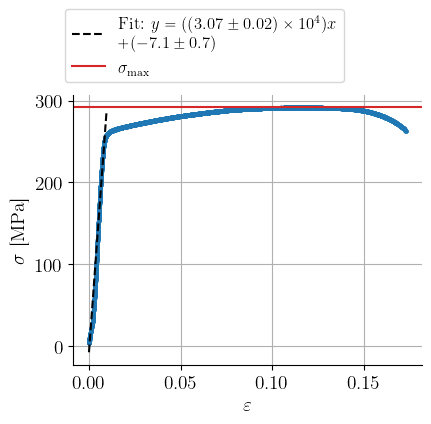

In [8]:
%matplotlib inline
E, s_max = do_everything_fuck_it(froid1_data, froid1, 50, 800)
write('../data/froid1_E', f'${E/1e9:.1uL}$')
write('../data/froid1_s_max', f'${s_max/1e6:.1uL}$')
plt.savefig('../figures/froid1_annotated.pdf')

E = (3.97±0.03)×10¹⁰
Error on the origin : (2.3±0.1)×10⁷


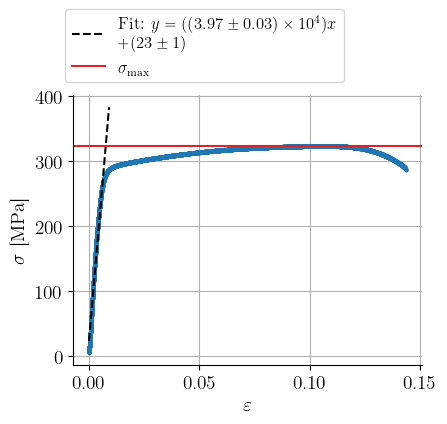

In [9]:
E, s_max = do_everything_fuck_it(froid2_data, froid2, 50, 800)
write('../data/froid2_E', f'${E/1e9:.1uL}$')
write('../data/froid2_s_max', f'${s_max/1e6:.1uL}$')
plt.savefig('../figures/froid2_annotated.pdf')

E = (3.7±0.3)×10¹⁰
Error on the origin : (6.3±0.2)×10⁷


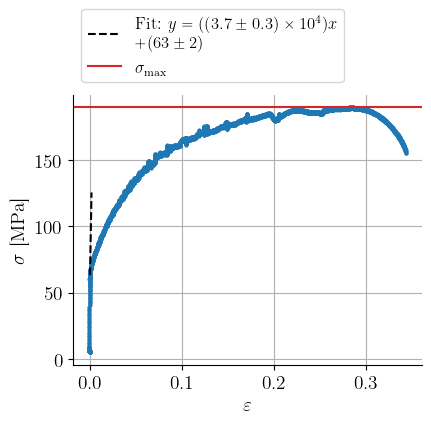

In [10]:
%matplotlib inline
E, s_max = do_everything_fuck_it(chaud3_data, chaud3, 114, 190)
write('../data/chaud3_E', f'${E/1e9:.1uL}$')
write('../data/chaud3_s_max', f'${s_max/1e6:.1uL}$')
plt.savefig('../figures/chaud3_annotated.pdf')

E = (-3.0±0.9)×10¹⁰
Error on the origin : (0±1)×10⁷


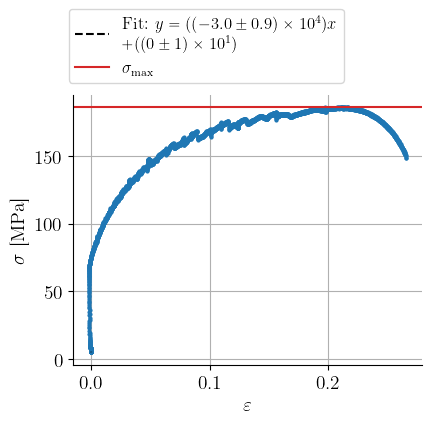

In [11]:
%matplotlib inline
# UNUSABLE BULLSHIT
E, s_max = do_everything_fuck_it(chaud4_data, chaud4, 170, 250)
write('../data/chaud4_E', f'${E/1e9:.1uL}$')
write('../data/chaud4_s_max', f'${s_max/1e6:.1uL}$')
plt.savefig('../figures/chaud4_annotated.pdf')

E = (5.2±0.2)×10¹⁰
Error on the origin : (6.4±0.2)×10⁷


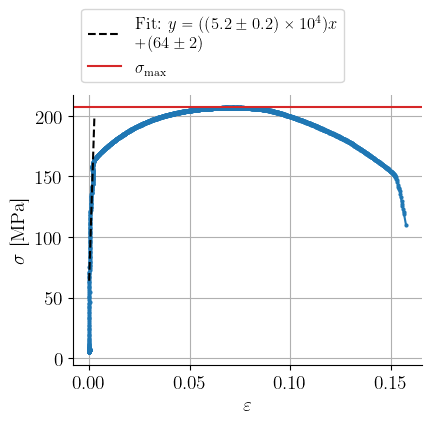

In [12]:
%matplotlib inline
E, s_max = do_everything_fuck_it(tiede5_data, tiede5, 155, 300)
write('../data/tiede5_E', f'${E/1e9:.1uL}$')
write('../data/tiede5_s_max', f'${s_max/1e6:.1uL}$')
plt.savefig('../figures/tiede5_annotated.pdf')

E = (2.60±0.03)×10¹⁰
Error on the origin : (-2.0±0.1)×10⁷


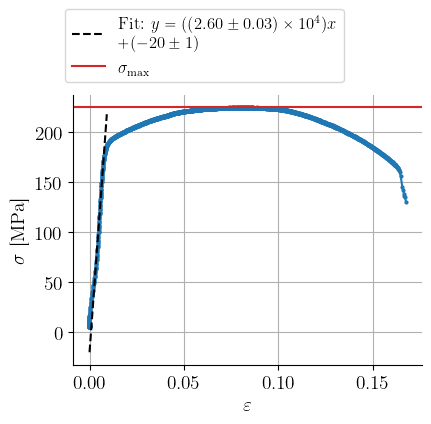

In [13]:
%matplotlib inline
### BEST
E, s_max = do_everything_fuck_it(tiede6_data, tiede6, 150, 270)
write('../data/tiede6_E', f'${E/1e9:.1uL}$')
write('../data/tiede6_s_max', f'${s_max/1e6:.1uL}$')
plt.savefig('../figures/tiede6_annotated.pdf')

E = (1.44±0.03)×10¹⁰
Error on the origin : (4.0±0.1)×10⁷


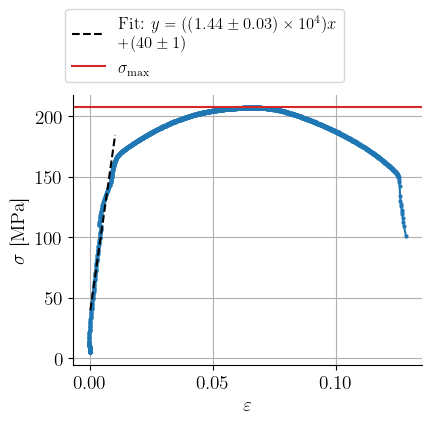

In [14]:
%matplotlib inline
E, s_max = do_everything_fuck_it(tiede7_data, tiede7, 240, 390)
write('../data/tiede7_E', f'${E/1e9:.1uL}$')
write('../data/tiede7_s_max', f'${s_max/1e6:.1uL}$')
plt.savefig('../figures/tiede7_annotated.pdf')

# FUCK IT DO EVERYTHING

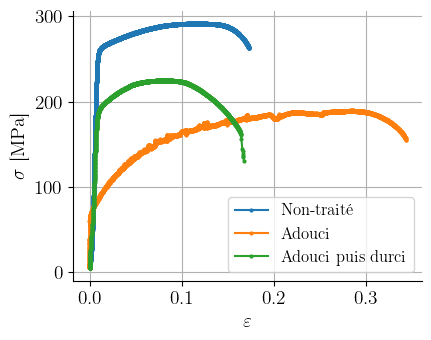

In [15]:
eps, sigma = convert(froid1_data, froid1)
plt.plot(nom_vals(eps), nom_vals(sigma)/1e6, 'o-', markersize=2, label='Non-traité')

eps, sigma = convert(chaud3_data, chaud3)
plt.plot(nom_vals(eps), nom_vals(sigma)/1e6, 'o-', markersize=2, label='Adouci')

eps, sigma = convert(tiede6_data, tiede6)
plt.plot(nom_vals(eps), nom_vals(sigma)/1e6, 'o-', markersize=2, label='Adouci puis durci')

plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'$\sigma$ [MPa]')
plt.grid()
plt.legend()
plt.savefig('../figures/comparaison.pdf')

## Potis très panchés